Let's load up our data and do a tiny bit of feature engineering. We have learned from looking at this data that because of how the data is distributed, we will want to work mostly with the log of median income and the log of the population, so we need to add those in some form. We have multiple options for which log to use, but the log base 10 is probably intuitive.

In [1]:
import pandas as pd
from math import log10

DATA = '/kaggle/input/income-urban-vs-rural-for-each-county/Income_Urban_VS_Rural.csv'
df = pd.read_csv(filepath_or_buffer=DATA)
df['log population'] = df['Total Population'].apply(func=log10)
df['log income'] = df['Median Household Income'].apply(func=lambda x: 0 if x < 0 else log10(x))
df.head()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural,log population,log income
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban,4.772945,4.844110
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban,5.380112,4.875171
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural,4.393698,4.646306
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural,4.345413,4.709397
4,Blount County,Alabama,1009,1,9,59292,61096,Urban,4.772996,4.786013


Let's start by just doing a scatterplot and coloring by whether the county is urban or rural.

<Axes: xlabel='Total Population', ylabel='Median Household Income'>

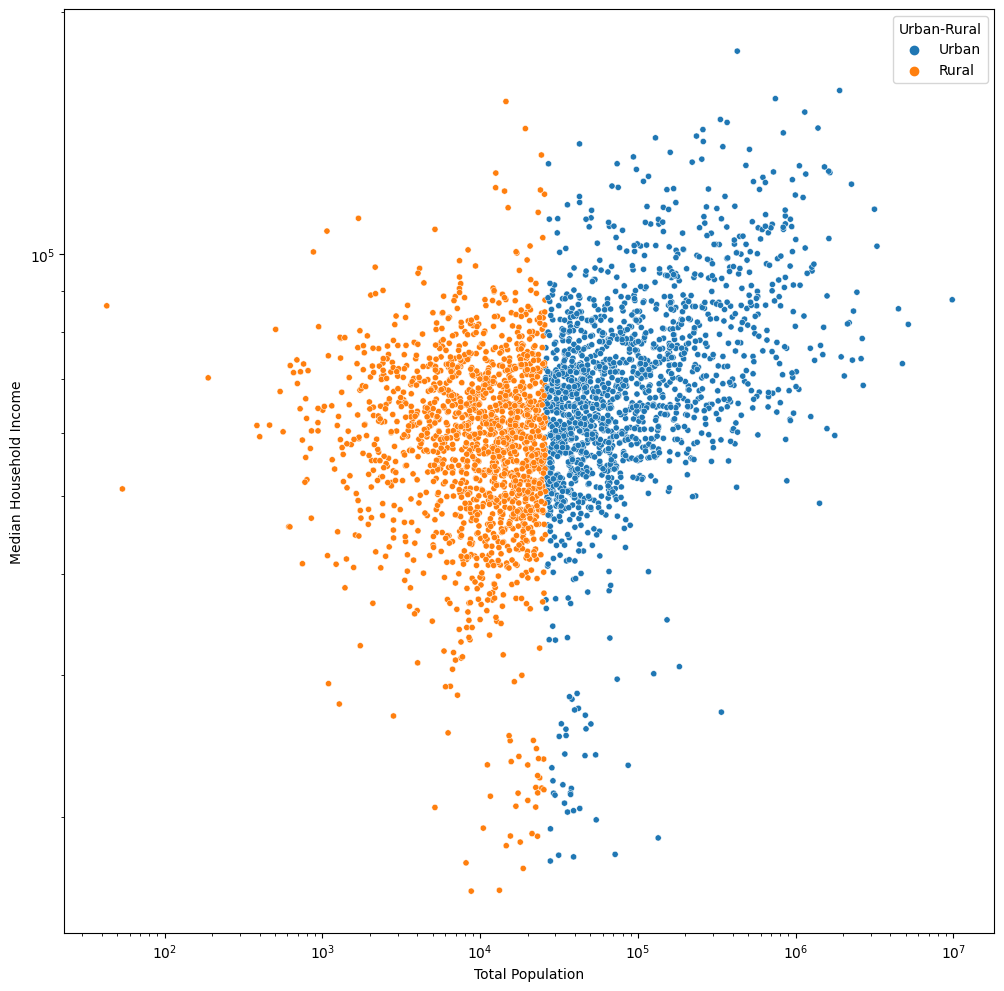

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(12, 12))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df[df['Median Household Income'] > 0], x='Total Population', y='Median Household Income', hue='Urban-Rural', s=20)

We need a log plot in both variables to get a reasonable-looking plot. The rural-urban divide looks sharp, but it isn't. Let's try plotting some other way.

<Axes: xlabel='Total Population', ylabel='Median Household Income'>

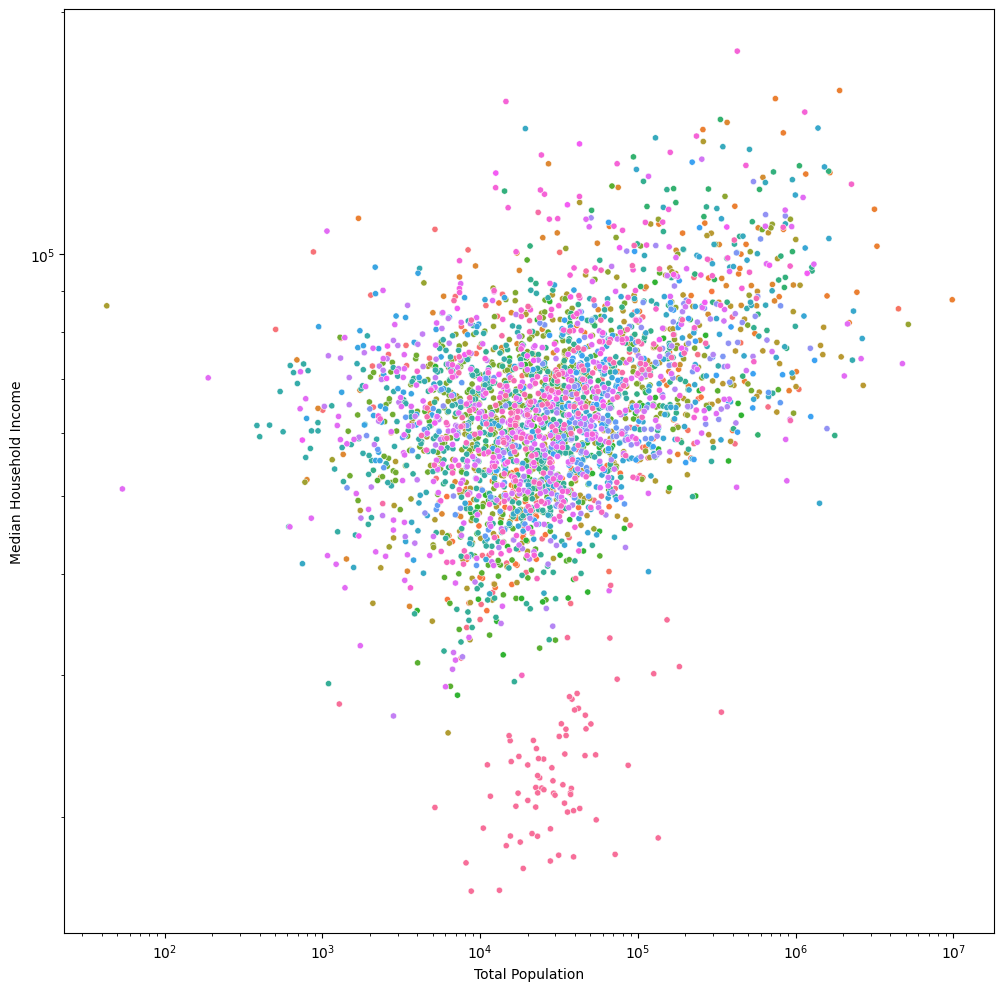

In [3]:
plt.figure(figsize=(12, 12))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df[df['Median Household Income'] > 0], x='Total Population', y='Median Household Income', hue='State', s=20, legend=False)

What do we see? We see there's not a lot of clustering based on the states, except for that cluster at the bottom.

In [4]:
from plotly import express

express.scatter(data_frame=df[df['Median Household Income'] > 0], x='log population', y='log income', height=800, color='State', hover_name='County',
               hover_data=['Total Population', 'Median Household Income'])

Wow. All the counties in that cluster at the bottom are in Puerto Rico. Go figure.